B2       0
B3       0
B4       0
B5       0
B8       0
B11      0
CI       0
DVI      0
EVI      0
EXG      0
FVI      0
GI       0
GLI      0
GNDVI    0
IPVI     0
MSAVI    0
MSR      0
NDDI     0
NDVI     0
NDWI     0
NDWI2    0
NGRDI    0
NPCI     0
OSAVI    0
RDVI     0
RVI      0
SAVI     0
SRPI     0
TVI      0
TCARI    0
CV       0
dtype: int64
B2       0
B3       0
B4       0
B5       0
B8       0
B11      0
CI       0
DVI      0
EVI      0
EXG      0
FVI      0
GI       0
GLI      0
GNDVI    0
IPVI     0
MSAVI    0
MSR      0
NDDI     0
NDVI     0
NDWI     0
NDWI2    0
NGRDI    0
NPCI     0
OSAVI    0
RDVI     0
RVI      0
SAVI     0
SRPI     0
TVI      0
TCARI    0
CV       0
dtype: int64
         B2      B3      B4      B5      B8     B11        CI     DVI  \
0    0.2528  0.2992  0.3258  0.3504  0.3946  0.3942  0.318850  0.0688   
1    0.2422  0.2822  0.3072  0.3255  0.3836  0.3779  0.359320  0.0764   
2    0.2298  0.2672  0.2868  0.3127  0.3676  0.3662  0.375748  0.0808   


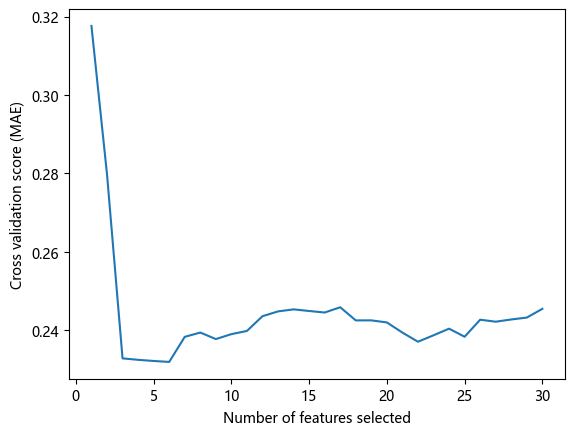

所选特征的名称: ['B3', 'B11', 'CI', 'NDWI', 'NDWI2', 'RDVI']
图形的数据: [(1, 0.31761143283296184), (2, 0.27978513699143037), (3, 0.23279002762704054), (4, 0.23241954548054852), (5, 0.2321268565382753), (6, 0.23188476785419782), (7, 0.23827934432415745), (8, 0.23938172803824936), (9, 0.237715421285336), (10, 0.2389738763414116), (11, 0.23978757017184318), (12, 0.2435464511152526), (13, 0.24477767156923483), (14, 0.24529298217688722), (15, 0.24487897571601341), (16, 0.2444901140837295), (17, 0.24582811557664136), (18, 0.24247904018835173), (19, 0.24248514094243076), (20, 0.24196111866480413), (21, 0.23936644641897792), (22, 0.23703663380348988), (23, 0.23867923639700547), (24, 0.2403687084369983), (25, 0.23830839898713405), (26, 0.24265280403566494), (27, 0.2421482640394313), (28, 0.2427175604714448), (29, 0.2431983379029023), (30, 0.24543010759932143)]


In [6]:
#%%
#matplotlib是一个面向对象的绘图库；sklearn涵盖了分类、回归、聚类、降维、模型选择、数据预处理六大模块;
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import matplotlib #主要用来作图
import matplotlib.pyplot as plt ##主要用来作图
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

matplotlib.rc("font", family='Microsoft YaHei') #使得图像中可以显示中文
dataset=pd.read_excel(r"E:\论文\综合长势\超参数优化\Total-特征选择.xlsx")
dataset.head()
print(dataset.isnull().sum())  # 检查空值
print(dataset.isin([np.nan, np.inf, -np.inf]).sum())  # 检查NaN和Inf

#Build a classification task using 31 informative features       # 建立特征，X有31个特征，其中有效特征3个。
X, y = make_classification(n_samples=1000, n_features=30, n_informative=25,n_redundant=5, n_repeated=0, n_classes=5, n_clusters_per_class=5, 
                           random_state=None)
X,y=dataset.iloc[:,:-1],dataset.iloc[:,-1]#可以表示x为除了最后一列，y为最后一列
print(X,y)#输出表示x，y
print("X维度", X.shape)
print("y维度",y.shape)

#RFECV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# 创建回归器(基于随机森林算法的特征选择方法)
rfr = RandomForestRegressor(n_estimators=128,
                              max_depth=8,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features=25, 
                              random_state=None)


# 使用 RFECV 进行特征筛选
rfecv = RFECV(estimator=rfr, step=1, cv=5, scoring='neg_mean_absolute_error')
rfecv.fit(X, y)

print("RFECV挑选了几个特征 : %d" % rfecv.n_features_)

# 画出不同特征数量下交叉认证验证得分
plt.figure()
# 选择的特征数量
plt.xlabel("Number of features selected")
# 交叉验证得分
plt.ylabel("Cross validation score (MAE)")
# 画出各个特征的得分
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score'])

# 输出每个特征及其对应的得分
selected_features = X.columns[rfecv.support_]
scores = -rfecv.cv_results_['mean_test_score']

for feature, score in zip(selected_features, scores):
    print(f"特征：{feature}, 得分：{score}")
plt.show()
#################保存到文件#########
#图形数据输出到指定文件
import pandas as pd

# 输出测试集预测值和真实值，并保存到Excel文件中
df = pd.DataFrame({'y_test': selected_features, 'y_pred': score})
with pd.ExcelWriter(r"E:\论文\综合长势\特征选择\Total\递归特征结果Total.xlsx") as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)


# 输出所选特征集合名称
selected_features = X.columns[rfecv.support_]
print("所选特征的名称: {}".format(list(selected_features)))
# 输出每次交叉验证，每个特征的得分，即画上图的数据
data = list(zip(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score']))

df = pd.DataFrame({'y_test': data})
with pd.ExcelWriter(r"E:\论文\综合长势\特征选择\Total\递归特征过程Total.xlsx") as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)

print("图形的数据: {}".format(data))

#%%


